## Importing libraries

In [1]:
pip install folium

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
Note: you may need to restart the kernel to use updated packages.


In [2]:
# import important libraries
from IPython.display import HTML
import base64
import pandas as pd 
import numpy as np # library to handle data in a vectorized manner
import requests 
from bs4 import BeautifulSoup
from geopy.geocoders import Nominatim

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

# import k-means from clustering stage
from sklearn.cluster import KMeans

# map rendering library

import folium 

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

print('Libraries imported.')

Libraries imported.


In [3]:

# @hidden_cell
# The following code contains the credentials for a file in your IBM Cloud Object Storage.
# You might want to remove those credentials before you share your notebook.
credentials_1 = {
    'IAM_SERVICE_ID': 'iam-ServiceId-eeef967b-a979-4e64-8539-52c0ddc161b5',
    'IBM_API_KEY_ID': 'qbxfaN1xRFQfcX_uOKEG91UD-5OJyEjPbHtJI6791kkY',
    'ENDPOINT': 'https://s3-api.us-geo.objectstorage.service.networklayer.com',
    'IBM_AUTH_ENDPOINT': 'https://iam.cloud.ibm.com/oidc/token',
    'BUCKET': 'peergradedassignmentfinalassignme-donotdelete-pr-mirjvnetrcrcwq',
    'FILE': 'neighborhood_berlin.csv'
}


In [4]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

if os.environ.get('RUNTIME_ENV_LOCATION_TYPE') == 'external':
    endpoint_094b5e81cffa458d8f18cc1eaf6c8877 = 'https://s3-api.us-geo.objectstorage.softlayer.net'
else:
    endpoint_094b5e81cffa458d8f18cc1eaf6c8877 = 'https://s3-api.us-geo.objectstorage.service.networklayer.com'

client_094b5e81cffa458d8f18cc1eaf6c8877 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='qbxfaN1xRFQfcX_uOKEG91UD-5OJyEjPbHtJI6791kkY',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url=endpoint_094b5e81cffa458d8f18cc1eaf6c8877)

body = client_094b5e81cffa458d8f18cc1eaf6c8877.get_object(Bucket='peergradedassignmentfinalassignme-donotdelete-pr-mirjvnetrcrcwq',Key='neighborhood_berlin.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body, sep=';')
df_data_1.head()


,Postal Code,Borough,Neighborhood
0,101,Mitte,Mitte
1,102,Mitte,Moabit
2,103,Mitte,Hansaviertel
3,104,Mitte,Tiergarten
4,105,Mitte,Wedding


In [5]:
df_data_1.shape

(97, 3)

In [6]:
# define the dataframe columns
column_names = ['Postal Code', 'Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighbors = pd.DataFrame(columns=column_names)

neighbors


,Postal Code,Borough,Neighborhood,Latitude,Longitude


In [7]:
Postal_code = df_data_1['Postal Code']
Neighborhood = df_data_1['Neighborhood']
Borough = df_data_1['Borough']
location = None
latitude = None
longitude = None

for data in range(0, len(Neighborhood)):
    pc = Postal_code[data]
    nb = Neighborhood[data]
    br = Borough[data]
    
    geolocator = Nominatim(user_agent="de-application")
    location = geolocator.geocode('{}'.format(nb))
    latitude = location.latitude
    longitude = location.longitude

    neighbors = neighbors.append({ 'Postal Code':pc, 'Neighborhood':nb,'Borough':br,'Latitude': location.latitude,'Longitude': location.longitude}, ignore_index=True)

In [8]:
neighbors

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,101,Mitte,Mitte,52.517885,13.404060
1,102,Mitte,Moabit,52.530102,13.342542
2,103,Mitte,Hansaviertel,52.519123,13.341872
3,104,Mitte,Tiergarten,50.340922,6.956329
4,105,Mitte,Wedding,52.550123,13.341970
5,106,Mitte,Gesundbrunnen,52.550920,13.384846
6,201,Friedrichshain-Kreuzberg,Friedrichshain,52.512215,13.450290
7,202,Friedrichshain-Kreuzberg,Kreuzberg,52.497644,13.411914
8,301,Pankow,Prenzlauer Berg,52.539847,13.428565
9,302,Pankow,Weißensee,52.554619,13.463002


In [9]:
geolocator = Nominatim(user_agent="de-application")
location = geolocator.geocode('Berlin')
latitude = location.latitude
longitude = location.longitude

print('The geographical coordinate of Berlin are {}, {}.'.format(latitude, longitude))

The geographical coordinate of Berlin are 52.5170365, 13.3888599.


In [10]:
map_berlin = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, neighborhood in zip(neighbors['Latitude'], neighbors['Longitude'], neighbors['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_berlin)  
    
map_berlin

In [11]:
CLIENT_ID = '0CBTZ3N0JMS4QCRYFCO5OHL1WUOOEPCOSNZBHCTZVE4ITXSP' # your Foursquare ID
CLIENT_SECRET = 'JLA1GSRKFVBJK5SGMTFUWLIMN1S0LGGYD341QTCC2KCYPN4I' # your Foursquare Secret
ACCESS_TOKEN = 'JGANG2DCF2O1FDCL0HRZ1Y4VPFFRWNPNYTGDGUDHBUUDYCKV' # your FourSquare Access Token
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 0CBTZ3N0JMS4QCRYFCO5OHL1WUOOEPCOSNZBHCTZVE4ITXSP
CLIENT_SECRET:JLA1GSRKFVBJK5SGMTFUWLIMN1S0LGGYD341QTCC2KCYPN4I


In [12]:
neighbors.loc[0, 'Neighborhood']

'Mitte'

In [13]:
neighborhood_latitude = neighbors.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = neighbors.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = neighbors.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Mitte are 52.5178855, 13.4040601.


In [14]:
search_query = 'venues'
radius = 1000
LIMIT = 100
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=0CBTZ3N0JMS4QCRYFCO5OHL1WUOOEPCOSNZBHCTZVE4ITXSP&client_secret=JLA1GSRKFVBJK5SGMTFUWLIMN1S0LGGYD341QTCC2KCYPN4I&v=20180605&ll=52.5178855,13.4040601&radius=1000&limit=100'

In [15]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '60b41f177cb5d641c7bcda43'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Mitte',
  'headerFullLocation': 'Mitte, Berlin',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 224,
  'suggestedBounds': {'ne': {'lat': 52.52688550900001,
    'lng': 13.418822634157962},
   'sw': {'lat': 52.50888549099999, 'lng': 13.389297565842039}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4e50ee55483bb7704924391a',
       'name': 'Bronzestatue "Heiliger St. Georg im Kampf mit dem Drachen"',
       'location': {'address': 'Probststr.',
        'crossStreet': 'Spreeufer',
        'lat': 52.51629022223086,
        'lng': 13.405557792008159,
    

In [16]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [17]:
venues = results['response']['groups'][0]['items']
nearby_venues = json_normalize(venues)
filtered_columns = ['venue.name', 'venue.id', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  from ipykernel import kernelapp as app


,name,id,categories,lat,lng
0,"Bronzestatue ""Heiliger St. Georg im Kampf mit ...",4e50ee55483bb7704924391a,Outdoor Sculpture,52.516290,13.405558
1,Designpanoptikum - surreales Museum für indust...,4f42de33e4b0a2bdc6c470ce,Museum,52.516941,13.406072
2,Kuppelumgang Berliner Dom,51838de5498e3fca634679a8,Scenic Lookout,52.518966,13.400981
3,Lustgarten,4adcda7cf964a5205f4721e3,Garden,52.518469,13.399454
4,Tigertörtchen,4ee917afd5fb86321f2b0297,Cupcake Shop,52.517150,13.407926


In [18]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

100 venues were returned by Foursquare.


In [19]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [20]:
# type your answer here
berlin_venues = getNearbyVenues(names=neighbors['Neighborhood'],
                                   latitudes=neighbors['Latitude'],
                                   longitudes=neighbors['Longitude']
                                  )

Mitte
Moabit
Hansaviertel
Tiergarten
Wedding
Gesundbrunnen
Friedrichshain
Kreuzberg
Prenzlauer Berg
Weißensee
Blankenburg
Heinersdorf
Karow
Stadtrandsiedlung Malchow
Pankow
Blankenfelde
Buch
Französisch Buchholz
Niederschönhausen
Rosenthal
Wilhelmsruh
Charlottenburg
Wilmersdorf
Schmargendorf
Grunewald
Westend
Charlottenburg-Nord
Halensee
Spandau
Haselhorst
Siemensstadt
Staaken
Gatow
Kladow
Hakenfelde
Falkenhagener Feld                        
Wilhelmstadt
Steglitz
Lichterfelde
Lankwitz
Zehlendorf
Dahlem
Nikolassee
Wannsee
Schöneberg
Friedenau
Tempelhof
Mariendorf
Marienfelde
Lichtenrade
Neukölln
Britz
Buckow
Rudow
Gropiusstadt
Alt-Treptow
Plaenterwald
Baumschulenweg
Johannisthal
Niederschöneweide
Altglienicke
Adlershof
Bohnsdorf
Oberschöneweide
Köpenick
Friedrichshagen
Rahnsdorf
Grünau
Müggelheim
Schmöckwitz
Marzahn
Mahlsdorf
Biesdorf
Kaulsdorf
Hellersdorf 
Lichtenberg
Friedrichsfelde
Karlshorst
Lichtenberg
Falkenberg
Malchow
Wartenberg
Neu-Hohenschönhausen
Alt-Hohenschönhausen
Fennpfu

In [21]:
print(berlin_venues.shape)
berlin_venues.head()

(1362, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Mitte,52.517885,13.40406,"Bronzestatue ""Heiliger St. Georg im Kampf mit ...",52.516290,13.405558,Outdoor Sculpture
1,Mitte,52.517885,13.40406,Designpanoptikum - surreales Museum für indust...,52.516941,13.406072,Museum
2,Mitte,52.517885,13.40406,Kuppelumgang Berliner Dom,52.518966,13.400981,Scenic Lookout
3,Mitte,52.517885,13.40406,Tigertörtchen,52.517150,13.407926,Cupcake Shop
4,Mitte,52.517885,13.40406,Radisson Blu,52.519561,13.402857,Hotel


In [22]:
berlin_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Adlershof,9,9,9,9,9,9
Alt-Hohenschönhausen,9,9,9,9,9,9
Alt-Treptow,23,23,23,23,23,23
Altglienicke,1,1,1,1,1,1
Baumschulenweg,4,4,4,4,4,4
Blankenburg,6,6,6,6,6,6
Blankenfelde,4,4,4,4,4,4
Bohnsdorf,4,4,4,4,4,4
Borsigwalde,4,4,4,4,4,4


In [23]:
print('There are {} uniques categories.'.format(len(berlin_venues['Venue Category'].unique())))

There are 228 uniques categories.


In [24]:
# one hot encoding
berlin_onehot = pd.get_dummies(berlin_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
berlin_onehot['Neighborhood'] = berlin_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [berlin_onehot.columns[-1]] + list(berlin_onehot.columns[:-1])
berlin_onehot = berlin_onehot[fixed_columns]

berlin_onehot.head()

,Zoo Exhibit,African Restaurant,American Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Asian Restaurant,Austrian Restaurant,Auto Dealership,Automotive Shop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Bathing Area,Bavarian Restaurant,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bistro,Boat or Ferry,Bookstore,Brasserie,Breakfast Spot,Brewery,Burger Joint,Bus Stop,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Canal,Candy Store,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Roaster,Coffee Shop,Comfort Food Restaurant,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Costume Shop,Credit Union,Creperie,Cupcake Shop,Currywurst Joint,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Dive Bar,Doner Restaurant,Donut Shop,Drugstore,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Fishing Store,Flower Shop,Food & Drink Shop,Food Court,Fountain,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,German Restaurant,Gift Shop,Go Kart Track,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Halal Restaurant,Harbor / Marina,Hardware Store,Historic Site,History Museum,Hobby Shop,Home Service,Hookah Bar,Hostel,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indoor Play Area,Insurance Office,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kebab Restaurant,Korean Restaurant,Kurdish Restaurant,Lake,Lawyer,Lebanese Restaurant,Light Rail Station,Liquor Store,Lounge,Martial Arts School,Mediterranean Restaurant,Memorial Site,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Motel,Motorcycle Shop,Movie Theater,Multiplex,Museum,Music Store,Music Venue,Nature Preserve,Neighborhood,Nightclub,Opera House,Organic Grocery,Outdoor Sculpture,Pakistani Restaurant,Palace,Paper / Office Supplies Store,Park,Pastry Shop,Pedestrian Plaza,Performing Arts Venue,Perfume Shop,Peruvian Restaurant,Pet Café,Pet Store,Pharmacy,Photography Studio,Pide Place,Pizza Place,Planetarium,Platform,Playground,Plaza,Polish Restaurant,Pool,Post Office,Pub,Record Shop,Rental Car Location,Restaurant,Rock Climbing Spot,Sandwich Place,Sauna / Steam Room,Scenic Lookout,Science Museum,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Snack Place,Soccer Field,Soup Place,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Club,Steakhouse,Street Art,Supermarket,Sushi Restaurant,Syrian Restaurant,Tapas Restaurant,Taverna,Tea Room,Tennis Court,Tennis Stadium,Thai Restaurant,Theater,Thrift / Vintage Store,Toy / Game Store,Track,Trail,Train Station,Tram Station,Trattoria/Osteria,Tree,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Warehouse Store,Waterfront,Windmill,Wine Bar,Wine Shop,Yoga Studio
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Mitte,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,Mitte,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [25]:
berlin_onehot.shape

(1362, 228)

In [26]:
berlin_grouped = berlin_onehot.groupby('Neighborhood').mean().reset_index()
berlin_grouped

,Neighborhood,Zoo Exhibit,African Restaurant,American Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Asian Restaurant,Austrian Restaurant,Auto Dealership,Automotive Shop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Bathing Area,Bavarian Restaurant,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bistro,Boat or Ferry,Bookstore,Brasserie,Breakfast Spot,Brewery,Burger Joint,Bus Stop,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Canal,Candy Store,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Roaster,Coffee Shop,Comfort Food Restaurant,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Costume Shop,Credit Union,Creperie,Cupcake Shop,Currywurst Joint,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Dive Bar,Doner Restaurant,Donut Shop,Drugstore,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Fishing Store,Flower Shop,Food & Drink Shop,Food Court,Fountain,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,German Restaurant,Gift Shop,Go Kart Track,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Halal Restaurant,Harbor / Marina,Hardware Store,Historic Site,History Museum,Hobby Shop,Home Service,Hookah Bar,Hostel,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indoor Play Area,Insurance Office,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kebab Restaurant,Korean Restaurant,Kurdish Restaurant,Lake,Lawyer,Lebanese Restaurant,Light Rail Station,Liquor Store,Lounge,Martial Arts School,Mediterranean Restaurant,Memorial Site,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Motel,Motorcycle Shop,Movie Theater,Multiplex,Museum,Music Store,Music Venue,Nature Preserve,Nightclub,Opera House,Organic Grocery,Outdoor Sculpture,Pakistani Restaurant,Palace,Paper / Office Supplies Store,Park,Pastry Shop,Pedestrian Plaza,Performing Arts Venue,Perfume Shop,Peruvian Restaurant,Pet Café,Pet Store,Pharmacy,Photography Studio,Pide Place,Pizza Place,Planetarium,Platform,Playground,Plaza,Polish Restaurant,Pool,Post Office,Pub,Record Shop,Rental Car Location,Restaurant,Rock Climbing Spot,Sandwich Place,Sauna / Steam Room,Scenic Lookout,Science Museum,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Snack Place,Soccer Field,Soup Place,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Club,Steakhouse,Street Art,Supermarket,Sushi Restaurant,Syrian Restaurant,Tapas Restaurant,Taverna,Tea Room,Tennis Court,Tennis Stadium,Thai Restaurant,Theater,Thrift / Vintage Store,Toy / Game Store,Track,Trail,Train Station,Tram Station,Trattoria/Osteria,Tree,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Warehouse Store,Waterfront,Windmill,Wine Bar,Wine Shop,Yoga Studio
0,Adlershof,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

In [27]:
num_top_venues = 5

for hood in berlin_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = berlin_grouped[berlin_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Adlershof----
               venue  freq
0        Supermarket  0.22
1         Steakhouse  0.11
2      Shopping Mall  0.11
3  Trattoria/Osteria  0.11
4          Drugstore  0.11


----Alt-Hohenschönhausen----
               venue  freq
0       Tram Station  0.22
1  Indian Restaurant  0.11
2        Post Office  0.11
3   Greek Restaurant  0.11
4      Big Box Store  0.11


----Alt-Treptow----
                  venue  freq
0    Italian Restaurant  0.09
1                Bakery  0.09
2  Gym / Fitness Center  0.04
3         Big Box Store  0.04
4         Boat or Ferry  0.04


----Altglienicke----
                           venue  freq
0                   Home Service   1.0
1                    Zoo Exhibit   0.0
2  Paper / Office Supplies Store   0.0
3                  Movie Theater   0.0
4                      Multiplex   0.0


----Baumschulenweg----
                           venue  freq
0                    Supermarket  0.50
1                 Ice Cream Shop  0.25
2               Asian Rest

             venue  freq
0         Platform  0.13
1     Tram Station  0.13
2  Automotive Shop  0.13
3   Cosmetics Shop  0.07
4  Motorcycle Shop  0.07


----Malchow----
                venue  freq
0         Supermarket  0.33
1  Seafood Restaurant  0.17
2  Italian Restaurant  0.17
3                Café  0.17
4   German Restaurant  0.17


----Mariendorf----
                venue  freq
0         Supermarket  0.29
1          Steakhouse  0.14
2      Ice Cream Shop  0.14
3  Chinese Restaurant  0.14
4                Park  0.14


----Marienfelde----
                  venue  freq
0              Bus Stop  0.25
1                  Park  0.25
2  Fast Food Restaurant  0.12
3           Pizza Place  0.12
4    Chinese Restaurant  0.12


----Marzahn----
               venue  freq
0           Windmill   0.2
1        Supermarket   0.2
2   Asian Restaurant   0.2
3       Tram Station   0.2
4  German Restaurant   0.2


----Mitte----
               venue  freq
0  German Restaurant  0.13
1               Café  0

In [28]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [29]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = berlin_grouped['Neighborhood']

for ind in np.arange(berlin_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(berlin_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Adlershof,Supermarket,Pizza Place,Italian Restaurant,Steakhouse,Shopping Mall,Greek Restaurant,Trattoria/Osteria,Drugstore,Diner,Dessert Shop
1,Alt-Hohenschönhausen,Tram Station,Indian Restaurant,Greek Restaurant,Big Box Store,Supermarket,Discount Store,Post Office,Drugstore,Falafel Restaurant,Farmers Market
2,Alt-Treptow,Italian Restaurant,Bakery,Playground,Tapas Restaurant,Garden Center,Boat or Ferry,Electronics Store,Mexican Restaurant,Juice Bar,Drugstore
3,Altglienicke,Home Service,Yoga Studio,Ethiopian Restaurant,Food Court,Food & Drink Shop,Flower Shop,Fishing Store,Fish Market,Fish & Chips Shop,Fast Food Restaurant
4,Baumschulenweg,Supermarket,Ice Cream Shop,Asian Restaurant,Event Space,Fountain,Food Court,Food & Drink Shop,Flower Shop,Fishing Store,Fish Market


In [30]:
neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Adlershof,Supermarket,Pizza Place,Italian Restaurant,Steakhouse,Shopping Mall,Greek Restaurant,Trattoria/Osteria,Drugstore,Diner,Dessert Shop
1,Alt-Hohenschönhausen,Tram Station,Indian Restaurant,Greek Restaurant,Big Box Store,Supermarket,Discount Store,Post Office,Drugstore,Falafel Restaurant,Farmers Market
2,Alt-Treptow,Italian Restaurant,Bakery,Playground,Tapas Restaurant,Garden Center,Boat or Ferry,Electronics Store,Mexican Restaurant,Juice Bar,Drugstore
3,Altglienicke,Home Service,Yoga Studio,Ethiopian Restaurant,Food Court,Food & Drink Shop,Flower Shop,Fishing Store,Fish Market,Fish & Chips Shop,Fast Food Restaurant
4,Baumschulenweg,Supermarket,Ice Cream Shop,Asian Restaurant,Event Space,Fountain,Food Court,Food & Drink Shop,Flower Shop,Fishing Store,Fish Market
5,Blankenburg,Hotel,German Restaurant,Plaza,Supermarket,Park,Café,Yoga Studio,Farmers Market,Exhibit,Falafel Restaurant
6,Blankenfelde,Café,Miscellaneous Shop,Automotive Shop,Event Space,Fountain,Food Court,Food & Drink Shop,Flower Shop,Fishing Store,Fish Market
7,Bohnsdorf,Miscellaneous Shop,Supermarket,Insurance Office,Italian Restaurant,Event Space,Fountain,Food Court,Food & Drink Shop,Flower Shop,Fishing Store
8,Borsigwalde,Motorcycle Shop,Supermarket,Go Kart Track,Bakery,Yoga Studio,Event Space,Food & Drink Shop,Flower Shop,Fishing Store,Fish Market
9,Britz,Palace,History Museum,German Restaurant,Lake,Bus Stop,Bakery,Historic Site,Soccer Field,Hotel,Diner


In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot(x, y, xlabel, ylabel):
    plt.figure(figsize=(20,10))
    plt.plot(np.arange(2, x), y, 'o-')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(np.arange(2, x))
    plt.show()

In [32]:
max_range = 20

berlin_grouped_clustering = berlin_grouped.drop('Neighborhood', 1)

from sklearn.metrics import silhouette_samples, silhouette_score

indices = []
scores = []

for kclusters in range(2, max_range) :
    
    # Run k-means clustering
    kmc = berlin_grouped_clustering
    kmeans = KMeans(n_clusters = kclusters, init = 'k-means++', random_state = 0).fit_predict(kmc)
    
    # Gets the score for the clustering operation performed
    score = silhouette_score(kmc, kmeans)
    
    # Appending the index and score to the respective lists
    indices.append(kclusters)
    scores.append(score)

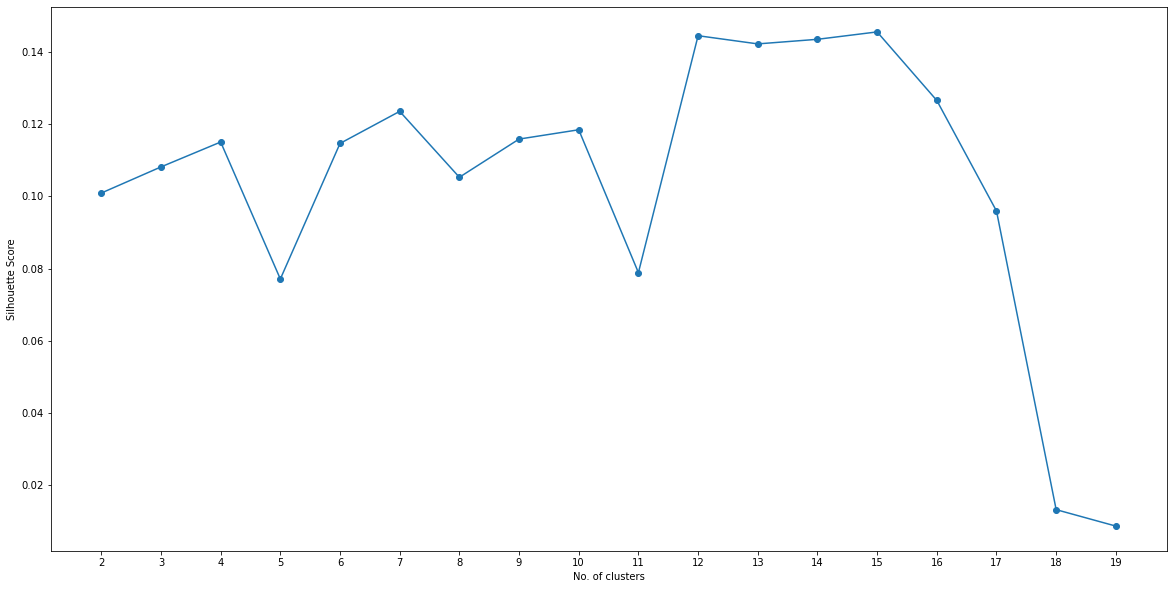

In [33]:
plot(max_range, scores, "No. of clusters", "Silhouette Score")

In [34]:
# set number of clusters
kclusters = 12

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(berlin_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([ 7,  0,  1, 11,  7,  1,  1,  7,  7,  1], dtype=int32)

In [35]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

berlin_merged = neighbors

# merge budapest_grouped with berlin_data to add latitude/longitude for each neighborhood
berlin_merged = berlin_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

berlin_merged

,Postal Code,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,101,Mitte,Mitte,52.517885,13.404060,1.0,German Restaurant,Museum,Hotel,History Museum,Café,Exhibit,Restaurant,Fountain,Plaza,Drugstore
1,102,Mitte,Moabit,52.530102,13.342542,1.0,Café,German Restaurant,Burger Joint,Gym / Fitness Center,Hostel,Bar,Doner Restaurant,Hotel,Clothing Store,Drugstore
2,103,Mitte,Hansaviertel,52.519123,13.341872,1.0,Café,Art Museum,Pedestrian Plaza,Irish Pub,Metro Station,Bus Stop,Mediterranean Restaurant,Farmers Market,Liquor Store,Bistro
3,104,Mitte,Tiergarten,50.340922,6.956329,1.0,Hotel,Rental Car Location,Trail,Restaurant,Eastern European Restaurant,Steakhouse,Fish Market,Fish & Chips Shop,Fast Food Restaurant,Electronics Store
4,105,Mitte,Wedding,52.550123,13.341970,7.0,Supermarket,Pharmacy,Ice Cream Shop,Tennis Court,Track,Big Box Store,Gas Station,Park,Farmers Market,Exhibit
5,106,Mitte,Gesundbrunnen,52.550920,13.384846,1.0,Turkish Restaurant,Drugstore,Supermarket,Clothing Store,Hotel,Bookstore,Bar,Trail,Garden,Big Box Store
6,201,Friedrichshain-Kreuzberg,Friedrichshain,52.512215,13.450290,1.0,Coffee Shop,Bookstore,Bagel Shop,Pub,Doner Restaurant,Café,Middle Eastern Restaurant,Hostel,Vegetarian / Vegan Restaurant,Plaza
7,202,Friedrichshain-Kreuzberg,Kreuzberg,52.497644,13.411914,1.0,Café,Italian Restaurant,Bakery,Coffee Shop,Waterfront,German Restaurant,Turkish Restaurant,Bar,Nightclub,Kurdish Restaurant
8,301,Pankow,Prenzlauer Berg,52.539847,13.428565,1.0,Café,Beer Bar,Cocktail Bar,Park,Organic Grocery,Coffee Shop,Bakery,Falafel Restaurant,Concert Hall,Candy Store
9,302,Pankow,Weißensee,52.554619,13.463002,1.0,German Restaurant,Hotel,Tram Station,Memorial Site,Playground,Vietnamese Restaurant,Beach,Park,Exhibit,Falafel Restaurant


In [62]:
# create map
import random
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(berlin_merged['Latitude'], berlin_merged['Longitude'], berlin_merged['Neighborhood'], berlin_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[random.randint(0,10)],
        fill=True,
        fill_color=rainbow[random.randint(0,10)],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [38]:
berlin_merged.loc[berlin_merged['Cluster Labels'] == 0, berlin_merged.columns[[0] + list(range(5, berlin_merged.shape[1]))]]


,Postal Code,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
14,307,0.0,Asian Restaurant,Turkish Restaurant,Tram Station,Yoga Studio,Ethiopian Restaurant,Food Court,Food & Drink Shop,Flower Shop,Fishing Store,Fish Market
70,1001,0.0,Asian Restaurant,Windmill,German Restaurant,Supermarket,Tram Station,Fish & Chips Shop,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Yoga Studio
83,1101,0.0,Tram Station,Indian Restaurant,Greek Restaurant,Big Box Store,Supermarket,Discount Store,Post Office,Drugstore,Falafel Restaurant,Farmers Market


In [39]:
berlin_merged.loc[berlin_merged['Cluster Labels'] == 1, berlin_merged.columns[[0] + list(range(5, berlin_merged.shape[1]))]]

,Postal Code,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,101,1.0,German Restaurant,Museum,Hotel,History Museum,Café,Exhibit,Restaurant,Fountain,Plaza,Drugstore
1,102,1.0,Café,German Restaurant,Burger Joint,Gym / Fitness Center,Hostel,Bar,Doner Restaurant,Hotel,Clothing Store,Drugstore
2,103,1.0,Café,Art Museum,Pedestrian Plaza,Irish Pub,Metro Station,Bus Stop,Mediterranean Restaurant,Farmers Market,Liquor Store,Bistro
3,104,1.0,Hotel,Rental Car Location,Trail,Restaurant,Eastern European Restaurant,Steakhouse,Fish Market,Fish & Chips Shop,Fast Food Restaurant,Electronics Store
5,106,1.0,Turkish Restaurant,Drugstore,Supermarket,Clothing Store,Hotel,Bookstore,Bar,Trail,Garden,Big Box Store
6,201,1.0,Coffee Shop,Bookstore,Bagel Shop,Pub,Doner Restaurant,Café,Middle Eastern Restaurant,Hostel,Vegetarian / Vegan Restaurant,Plaza
7,202,1.0,Café,Italian Restaurant,Bakery,Coffee Shop,Waterfront,German Restaurant,Turkish Restaurant,Bar,Nightclub,Kurdish Restaurant
8,301,1.0,Café,Beer Bar,Cocktail Bar,Park,Organic Grocery,Coffee Shop,Bakery,Falafel Restaurant,Concert Hall,Candy Store
9,302,1.0,German Restaurant,Hotel,Tram Station,Memorial Site,Playground,Vietnamese Restaurant,Beach,Park,Exhibit,Falafel Restaurant
10,303,1.0,Hotel,German Restaurant,Plaza,Supermarket,Park,Café,Yoga Studio,Farmers Market,Exhibit,Falafel Restaurant


In [40]:
berlin_merged.loc[berlin_merged['Cluster Labels'] == 2, berlin_merged.columns[[0] + list(range(5, berlin_merged.shape[1]))]]


,Postal Code,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
79,1101,2.0,Photography Studio,Grocery Store,Yoga Studio,Food Court,Food & Drink Shop,Flower Shop,Fishing Store,Fish Market,Fish & Chips Shop,Fast Food Restaurant


In [42]:
berlin_merged.loc[berlin_merged['Cluster Labels'] == 3, berlin_merged.columns[[0] + list(range(5, berlin_merged.shape[1]))]]


,Postal Code,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
34,507,3.0,Playground,Yoga Studio,Ethiopian Restaurant,Food Court,Food & Drink Shop,Flower Shop,Fishing Store,Fish Market,Fish & Chips Shop,Fast Food Restaurant


In [43]:
berlin_merged.loc[berlin_merged['Cluster Labels'] == 4, berlin_merged.columns[[0] + list(range(5, berlin_merged.shape[1]))]]


,Postal Code,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
67,913,4.0,Hotel,Yoga Studio,Ethiopian Restaurant,Food Court,Food & Drink Shop,Flower Shop,Fishing Store,Fish Market,Fish & Chips Shop,Fast Food Restaurant


In [44]:
berlin_merged.loc[berlin_merged['Cluster Labels'] == 5, berlin_merged.columns[[0] + list(range(5, berlin_merged.shape[1]))]]


,Postal Code,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
89,1201,5.0,Insurance Office,Lawyer,Yoga Studio,Ethiopian Restaurant,Food Court,Food & Drink Shop,Flower Shop,Fishing Store,Fish Market,Fish & Chips Shop


In [45]:
berlin_merged.loc[berlin_merged['Cluster Labels'] == 6, berlin_merged.columns[[0] + list(range(5, berlin_merged.shape[1]))]]


,Postal Code,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
13,306,6.0,Playground,Bus Stop,Restaurant,Yoga Studio,Ethiopian Restaurant,Food & Drink Shop,Flower Shop,Fishing Store,Fish Market,Fish & Chips Shop
31,504,6.0,Bus Stop,Supermarket,Restaurant,Eastern European Restaurant,Yoga Studio,Event Space,Food & Drink Shop,Flower Shop,Fishing Store,Fish Market
56,902,6.0,Bus Stop,Supermarket,Light Rail Station,Yoga Studio,French Restaurant,Food Court,Food & Drink Shop,Flower Shop,Fishing Store,Fish Market
88,1201,6.0,Bus Stop,Supermarket,Italian Restaurant,Restaurant,Yoga Studio,Ethiopian Restaurant,Food & Drink Shop,Flower Shop,Fishing Store,Fish Market


In [47]:
berlin_merged.loc[berlin_merged['Cluster Labels'] == 7, berlin_merged.columns[[0] + list(range(5, berlin_merged.shape[1]))]]


,Postal Code,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,105,7.0,Supermarket,Pharmacy,Ice Cream Shop,Tennis Court,Track,Big Box Store,Gas Station,Park,Farmers Market,Exhibit
11,304,7.0,Supermarket,Fried Chicken Joint,Chinese Restaurant,Fish Market,Tram Station,Food Court,Food & Drink Shop,Flower Shop,Fishing Store,Fish & Chips Shop
12,305,7.0,Supermarket,Bus Stop,Skating Rink,Yoga Studio,Event Space,Food & Drink Shop,Flower Shop,Fishing Store,Fish Market,Fish & Chips Shop
17,310,7.0,Supermarket,Garden Center,Drugstore,Organic Grocery,Yoga Studio,Event Space,Food & Drink Shop,Flower Shop,Fishing Store,Fish Market
35,508,7.0,Supermarket,Snack Place,Drugstore,Yoga Studio,Ethiopian Restaurant,Food & Drink Shop,Flower Shop,Fishing Store,Fish Market,Fish & Chips Shop
39,603,7.0,Supermarket,Drugstore,Movie Theater,Fast Food Restaurant,Park,German Restaurant,Bakery,Yoga Studio,Exhibit,Food & Drink Shop
43,607,7.0,Supermarket,Harbor / Marina,Indian Restaurant,Chinese Restaurant,Bank,Bakery,Austrian Restaurant,Liquor Store,Post Office,Farmers Market
47,704,7.0,Supermarket,Ice Cream Shop,Park,Steakhouse,Chinese Restaurant,Greek Restaurant,Diner,Exhibit,Food & Drink Shop,Dance Studio
53,804,7.0,Supermarket,Ice Cream Shop,Italian Restaurant,Drugstore,Bank,Diner,Falafel Restaurant,Fountain,Food Court,Deli / Bodega
57,903,7.0,Supermarket,Ice Cream Shop,Asian Restaurant,Event Space,Fountain,Food Court,Food & Drink Shop,Flower Shop,Fishing Store,Fish Market


In [48]:
berlin_merged.loc[berlin_merged['Cluster Labels'] == 8, berlin_merged.columns[[0] + list(range(5, berlin_merged.shape[1]))]]


,Postal Code,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
33,506,8.0,Bakery,Flower Shop,Ethiopian Restaurant,Fountain,Food Court,Food & Drink Shop,Fishing Store,Fish Market,Fish & Chips Shop,Fast Food Restaurant


In [49]:
berlin_merged.loc[berlin_merged['Cluster Labels'] == 9, berlin_merged.columns[[0] + list(range(5, berlin_merged.shape[1]))]]


,Postal Code,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
75,1101,9.0,Hostel,Historic Site,Yoga Studio,Ethiopian Restaurant,Food Court,Food & Drink Shop,Flower Shop,Fishing Store,Fish Market,Fish & Chips Shop
78,1101,9.0,Hostel,Historic Site,Yoga Studio,Ethiopian Restaurant,Food Court,Food & Drink Shop,Flower Shop,Fishing Store,Fish Market,Fish & Chips Shop
86,1201,9.0,Hostel,Insurance Office,Nature Preserve,Liquor Store,Yoga Studio,Event Space,Food Court,Food & Drink Shop,Flower Shop,Fishing Store


In [51]:
berlin_merged.loc[berlin_merged['Cluster Labels'] == 10, berlin_merged.columns[[0] + list(range(5, berlin_merged.shape[1]))]]


,Postal Code,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
49,706,10.0,Soccer Field,Supermarket,Bus Stop,Doner Restaurant,Miscellaneous Shop,Yoga Studio,Exhibit,Food Court,Food & Drink Shop,Flower Shop
81,1101,10.0,Indian Restaurant,Supermarket,Soccer Field,German Restaurant,Fountain,Food & Drink Shop,Flower Shop,Fishing Store,Fish Market,Fish & Chips Shop


In [52]:
berlin_merged.loc[berlin_merged['Cluster Labels'] == 11, berlin_merged.columns[[0] + list(range(5, berlin_merged.shape[1]))]]


,Postal Code,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
60,906,11.0,Home Service,Yoga Studio,Ethiopian Restaurant,Food Court,Food & Drink Shop,Flower Shop,Fishing Store,Fish Market,Fish & Chips Shop,Fast Food Restaurant
